<p align="center"><img src="https://github.com/insaid2018/Term-1/blob/master/Images/INSAID_Full%20Logo.png?raw=true" width="260" height="110" /></p>

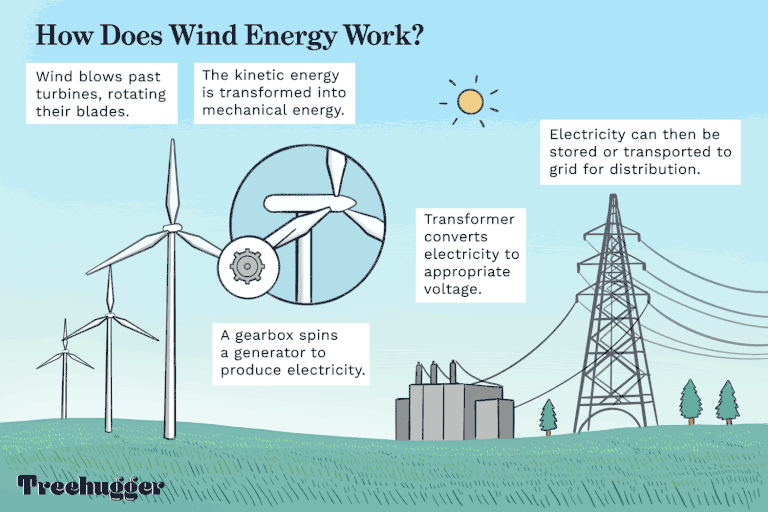

## WIND-TURBINE POWER PREDICTION (MACHINE LEARNING - ADVANCED)

**Submitted by NARAYAN V. SHANBHAG**

**GCD Student, INSAID**

**Batch: May 9,2021**

---
# **Table of Contents**
---

1. [**Introduction**](#Section1)<br>
2. [**Problem Statement**](#Section2)<br>
3. [**Installing & Importing Libraries**](#Section3)<br>
  3.1 [**Installing Libraries**](#Section31)<br>
  3.2 [**Upgrading Libraries**](#Section32)<br>
  3.3 [**Importing Libraries**](#Section33)<br>
4. [**Data Acquisition & Description**](#Section4)<br>
5. [**Data Pre-Profiling**](#Section5)<br>
6. [**Data Pre-Processing**](#Section6)<br>
7. [**Data Post-Profiling**](#Section7)<br>
8. [**Exploratory Data Analysis**](#Section8)<br>
9. [**Summarization**](#Section9)</br>
  9.1 [**Conclusion**](#Section91)</br>
  9.2 [**Actionable Insights**](#Section91)</br>

---

---
<a name = Section1></a>
# **1. Introduction**

---
### Company Introduction - Energy Limited

### Your client for this project is a Renewable energy institution.

- 1) They are going to provide an amount of power generated from a wind turbine in KW/hr by using the real time data.
- 2) Factors such as temperature, wind direction, turbine status, weather, blade length, etc. influence the amount of power generated.
- 3) We have to select the most important features which help us to generate more power in an efficient way.

### Current Scenario

 - 1) The company rolled out this service to several areas and they will monitor which features can increase the power generated by the turbines. Using this they can map those areas for future investments.

---
<a name = Section2></a>
# **2. Problem Statement**
---
- This section is emphasised on providing some generic introduction to the problem that most companies confront.

Moving from traditional energy plans powered by fossil fuels to unlimited renewable energy subscriptions allows for instant access to clean energy without heavy investment in infrastructure like Wind Turbines.


### The current process suffers from the following problems:

- 1) One issue is that **spinning turbine** blades can pose a threat to flying wildlife like birds and bats.
- 2) Wind energy can have adverse environmental impacts, including the potential to reduce, fragment, or degrade habitat for wildlife, fish, and plants.
- 3) The company wants to figure out how they can manage these challenges to produce wind energy in an efficient manner.

The energy department has hired you as data science consultants.

### Your Role
- You are given datasets of wind turbines and the power generated by them.
- Your task is to build a regression model using the datasets.
- Because there was no machine learning model for this problem in the company, you don’t have a quantifiable win condition. You need to build the best possible model.


### Project Deliverable
   - Deliverable: **Deliverable: Predict the power that is generated (in KW/h) based on the various features provided in the dataset.**
   - Machine Learning Task: **Regression**
   - Target Variable: **windmill_generated_power(kW/h)**
   - Win Condition: **N/A (best possible model)**

### Evaluation Metric
   - The model evaluation will be based on the **r2** Score.

# **3. Installing & Importing Libraries**
---
- This section is emphasised on installing and importing the necessary libraries that will be required.

### **Installing Libraries**

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
!pip install -q datascience                                         
# Package that is required by pandas profiling
!pip install -q pandas-profiling                                    
# Library to generate basic statistics about data

# To install more libraries insert your code here..


### **Upgrading Libraries**

- **After upgrading** the libraries, you need to **restart the runtime** to make the libraries in sync.

- Make sure not to execute the cell under Installing Libraries and Upgrading Libraries again after restarting the runtime.

In [ ]:
!pip install -q --upgrade pandas-profiling                          
# Upgrading pandas profiling to the latest version

### **Importing Libraries**

- You can headstart with the basic libraries as imported inside the cell below.

- If you want to import some additional libraries, feel free to do so.

In [ ]:
#-------------------------------------------------------------------------------------------------------------------------------
import pandas as pd                                                 # Importing package pandas (For Panel Data Analysis)
from pandas_profiling import ProfileReport                          # Import Pandas Profiling (To generate Univariate Analysis)
#-------------------------------------------------------------------------------------------------------------------------------
import numpy as np                                                  # Importing package numpys (For Numerical Python)
#-------------------------------------------------------------------------------------------------------------------------------
import matplotlib.pyplot as plt                                     # Importing pyplot interface to use matplotlib
import seaborn as sns                                               # Importing seaborn library for interactive visualization
%matplotlib inline
#-------------------------------------------------------------------------------------------------------------------------------
import scipy as sp                                                  # Importing library for scientific calculations
#-------------------------------------------------------------------------------------------------------------------------------
import warnings
warnings.filterwarnings('ignore')

In [ ]:
! pip install sweetviz

In [ ]:
! pip install autoviz

# 4. Data  Description

 - We are provided with a dataset containing all the necessary information about the customers like their **wind_speed(m/s),atmospheric_temperature(°C),shaft_temperature(°C),wind_direction(°) etc.**

 - Also included in the dataset is the column **windmill_generated_power(kW/h)** which contains continuous value .This is the data that we have to predict for how much power is generated (in KW/h).

#### The dataset is divided into two parts: Train and Test sets.

#### Training Set: 
 - The train set contains **19740 rows** and **22 columns**
 - The last column **windmill_generated_power(kW/h)** is the **target variable**.

#### Testing Set:
 - The test set contains **8460 rows** and **21 columns**.
 - The test set **doesn’t contain** the **windmill_generated_power(kW/h)** column.
 - It needs to be predicted for the test set.
 

**Train Set:**

| Records |Features|Target Variable|
|:--|:--|:--|
|**19740**|**22**|**windmill_generated_power(kW/h)**|

**Test Set:**

|Records|Features|Predicted Variable|
|:--|:--|:--|
|**8460**|**21**|**windmill_generated_power(kW/h)**|
 
 |***ID***|****Feature****|****Description****|
|:--|:--|:--|
|01| tracking_id       | Represents a unique identification number of a windmill.|
|02| datetime  | Represents the date and time of a record.|  
|03| wind_speed(m/s)       | Represents the speed of wind (in meter per second).| 
|04| atmospheric_temperature(°C)    | Represents the temperature (in degree Celsius) of a town or village that the windmill is present in.|   
|05| shaft_temperature(°C)    | Represents the temperature of the shaft (in degree Celsius). |
|06| blades_angle(°)       | Represents the angle of the blades of a wind turbine (in degrees).|
|07| gearbox_temperature(°C)     | Represents the temperature of a gearbox (in degree Celsius).|
|08| engine_temperature(°C) | Represents the temperature of an engine (in degree Celsius).|
|09| motor_torque(N-m) | Represents the torque of a motor (in Newton meter).|
|10| generator_temperature(°C) | Represents the temperature of a generator (in degree Celsius).|
|11| atmospheric_pressure(Pascal) | Represents the atmospheric pressure (in Pascals) in that area.|
|12| area_temperature(°C)      | Represents the temperature (in degree Celsius) of the area within a 100 m radius of the windmill.|
|13| windmill_body_temperature(°C) | Represents the temperature of the body of a windmill (in degree Celsius).|
|14| wind_direction(°) | Represents the direction of the wind (in degrees).|
|15| resistance(ohm) | Represents the resistance against the wind.|
|16| rotor_torque(N-m) | Represents the torque of a rotor (in Newton meter).|
|17| turbine_status | Represents the torque of a rotor (in Newton meter).|
|18| cloud_level | Represents the following levels of the cloud in the sky on a particular day:
Extremely low
Low
Medium.|
|19| blade_length(m) | Represents the length of the blades of a windmill (in meter)|
|20| blade_breadth(m) | Represents the breadth of the blades of a windmill (in meter).|
|21| windmill_height(m) | Represents the height of the blades of a windmill (in meter).|
|22| windmill_generated_power(kW/h)| Represents the power generated (in Kilowatt per hour)|

---
<a name = Section4></a>
# **5. Data Acquisition**
---

- This section is emphasised on the accquiring the data and obtain some descriptive information out of it.

- You could either scrap the data and then continue, or use a direct source of link (generally preferred in most cases).

- You will be working with a direct source of link to head start your work without worrying about anything.

- Before going further you must have a good idea about the features of the data set:



In [ ]:
#from google.colab import files
#uploaded = files.upload()
#import io
#data = pd.read_csv(io.BytesIO(uploaded['Churn_train.csv']))


In [ ]:
#data = pd.read_csv(filepath_or_buffer = 'https://raw.githubusercontent.com/insaid2018/Term-1/master/Data/Projects/car_sales.csv', encoding='cp1252')
data = pd.read_csv("D://Windturbine_train.csv",skipinitialspace=True)
data
print('Data Shape:', data.shape)
data.head()
#Initial Analysis shows there are 5634 RECORDS/ROWS and 21 FEATURES/COLUMNS

 ### **Data Information**
- **Totally there are 22 Columns/Features out of which 18 are NUMERICAL(FLOAT) and 4 are CATEGORICAL**
- **Check whether the NUMERICAL Columns have 0s and if they are relevant**

In [ ]:
# Insert your code here
data.info(all)

### **Data Description**

- **To get some quick description out of the data you can use describe method defined in pandas library.**
-**Gives the 5-Point or 5-Number summary and other details such as Count, Mean and Standard Deviation of the data-set**

In [ ]:
data.describe()

In [ ]:
data_final = pd.read_csv("D://Windturbine_test.csv")
print('Data Shape:', data_final.shape)
data_final

In [ ]:
data_final.info(all)

In [ ]:
data_final.describe()

---
<a name = Section5></a>
# **6. Data Pre-Profiling**
---

- This section is emphasised on getting a report about the data.

- You need to perform pandas profiling and get some observations out of it...

In [ ]:
# Insert your code here...
profile_Wind_Turbine_Power_Prediction_Train = ProfileReport(df=data)
profile_Wind_Turbine_Power_Prediction_Train

**5.1 Data Pre-Profiling for TEST SET**

In [ ]:
profile_Wind_Turbine_Power_Prediction_Test  = ProfileReport(df=data_final)
profile_Wind_Turbine_Power_Prediction_Test

---
<a name = Section6></a>
# **7. Data Pre-Processing**
---

- This section is emphasised on performing data manipulation over unstructured data for further processing and analysis.

- To modify unstructured data to strucuted data you need to verify and manipulate the integrity of the data by:
  - **Handling/Checking Duplicate Data for both the TRAIN and TEST Data Sets**

  - Handling missing data,

  - Handling redundant data,

  - Handling inconsistent data,

  - Handling outliers,

  - Handling typos

-**There are actually NO DUPLICATE RECORDS/ROWS in the DATA-SETS**



In [ ]:
# Insert your code here...
data[data.duplicated()]

In [ ]:
data_final[data_final.duplicated()]

-**Now Check ALL the NUMERICAL COLUMNS for ZERO values and Replace/Substitute them with appropriate values**

In [ ]:
data.isnull().sum()

In [ ]:
(data == -99 ).sum(axis = 0)

In [ ]:
data.replace(-99, np.NaN, inplace=True)

In [ ]:
data.isnull().sum()

In [ ]:
(data == 0 ).sum(axis = 0)

In [ ]:
data_final.isnull().sum()

In [ ]:
(data_final == -99 ).sum(axis = 0)

In [ ]:
data_final.replace(-99, np.NaN, inplace=True)

In [ ]:
data_final.isnull().sum()

In [ ]:
(data_final == 0 ).sum(axis = 0)

In [ ]:
missing_cols_train = data.isna().sum()[data.isna().sum().values>0].index
missing_cols_train

In [ ]:
missing_cols_test = data_final.isna().sum()[data_final.isna().sum().values>0].index
missing_cols_test

### **Check whether the DataSet is Balanced for the label column**

In [ ]:
import matplotlib.pyplot as plt
plt.figure (figsize =(12,8))
sns.heatmap(data.corr(),annot=True,cmap ='icefire', fmt='.0%').set_title('HeatMap')
plt.show()

###  Observations in inter-correlationships
- Resistance(ohm) is having correlationship with motor_torque(N-m) and generator_temperature(°C)
- area_temperature(°C) is having correlationship with motor_torque(N-m) and generator_temperature(°C)
- generator_temperature(°C) is having correlationship with motor_torque(N-m)

In [ ]:
import sweetviz as sv
sweet_report_Solar_Radiation = sv.analyze(data)
sweet_report_Solar_Radiation.show_html('Wind_Turbine_Power_Prediction_Sweet_Report_.html')

In [ ]:
from autoviz.AutoViz_Class import AutoViz_Class
AV = AutoViz_Class()
df = AV.AutoViz('D:/Windturbine_train.csv',verbose=2,save_plot_dir="D:/")  

In [ ]:
import dtale
import pandas as pd
d = dtale.show(data)
d.open_browser()

### OBSERVATIONS
- Average price is highly correlated with Type and Region

In [ ]:
data.isnull().sum()

In [ ]:
print(data['turbine_status'].mode())
print(data_final['turbine_status'].mode())

In [ ]:
data['turbine_status'].fillna(value = 'A', inplace = True)
data_final['turbine_status'].fillna(value = 'D', inplace = True)

In [ ]:
print(data['cloud_level'].mode())
print(data_final['cloud_level'].mode())

In [ ]:
data['cloud_level'].fillna(value = 'Low', inplace = True)
data_final['cloud_level'].fillna(value = 'Low', inplace = True)

In [ ]:
print(data['wind_speed(m/s)'].mean())
print(data['wind_speed(m/s)'].median())
print(data_final['wind_speed(m/s)'].mean())
print(data_final['wind_speed(m/s)'].median())

In [ ]:
data['wind_speed(m/s)'].fillna(value = 69.21640953397036, inplace = True)
data_final['wind_speed(m/s)'].fillna(value = 68.61832301880459, inplace = True)

In [ ]:
print(data['atmospheric_temperature(°C)'].mean())
print(data['atmospheric_temperature(°C)'].median())
print(data_final['atmospheric_temperature(°C)'].mean())
print(data_final['atmospheric_temperature(°C)'].median())

In [ ]:
data['atmospheric_temperature(°C)'].fillna(value = 19.2839042734601, inplace = True)
data_final['atmospheric_temperature(°C)'].fillna(value = 19.04380289639055, inplace = True)

In [ ]:
print(data['shaft_temperature(°C)'].mean())
print(data['shaft_temperature(°C)'].median())
print(data_final['shaft_temperature(°C)'].mean())
print(data_final['shaft_temperature(°C)'].median())

In [ ]:
data['shaft_temperature(°C)'].fillna(value = 42.795543184221344, inplace = True)
data_final['shaft_temperature(°C)'].fillna(value = 43.10457897221506, inplace = True)

In [ ]:
print(data['blades_angle(°)'].mean())
print(data['blades_angle(°)'].median())
print(data_final['blades_angle(°)'].mean())
print(data_final['blades_angle(°)'].median())

In [ ]:
data['blades_angle(°)'].fillna(value = 10.434797116262086, inplace = True)
data_final['blades_angle(°)'].fillna(value = 10.660755713864983, inplace = True)

In [ ]:
print(data['gearbox_temperature(°C)'].mean())
print(data['gearbox_temperature(°C)'].median())
print(data_final['gearbox_temperature(°C)'].mean())
print(data_final['gearbox_temperature(°C)'].median())

In [ ]:
data['gearbox_temperature(°C)'].fillna(value = 42.44034085257453, inplace = True)
data_final['gearbox_temperature(°C)'].fillna(value = 42.27795841701748, inplace = True)

In [ ]:
print(data['engine_temperature(°C)'].mean())
print(data['engine_temperature(°C)'].median())
print(data_final['engine_temperature(°C)'].mean())
print(data_final['engine_temperature(°C)'].median())

In [ ]:
data['engine_temperature(°C)'].fillna(value = 42.6416997825372, inplace = True)
data_final['engine_temperature(°C)'].fillna(value = 42.550158054359585, inplace = True)

In [ ]:
print(data['motor_torque(N-m)'].mean())
print(data['motor_torque(N-m)'].median())
print(data_final['motor_torque(N-m)'].mean())
print(data_final['motor_torque(N-m)'].median())

In [ ]:
data['motor_torque(N-m)'].fillna(value = 1712.4580740321285, inplace = True)
data_final['motor_torque(N-m)'].fillna(value = 1706.9985916821354, inplace = True)

In [ ]:
print(data['generator_temperature(°C)'].mean())
print(data['generator_temperature(°C)'].median())
print(data_final['generator_temperature(°C)'].mean())
print(data_final['generator_temperature(°C)'].median())

In [ ]:
data['generator_temperature(°C)'].fillna(value = 65.05989986764423, inplace = True)
data_final['generator_temperature(°C)'].fillna(value = 64.95309796505789, inplace = True)

In [ ]:
print(data['atmospheric_pressure(Pascal)'].mean())
print(data['atmospheric_pressure(Pascal)'].median())
print(data_final['atmospheric_pressure(Pascal)'].mean())
print(data_final['atmospheric_pressure(Pascal)'].median())

In [ ]:
data['atmospheric_pressure(Pascal)'].fillna(value = 18178.58543540145, inplace = True)
data_final['atmospheric_pressure(Pascal)'].fillna(value = 18234.24559303024, inplace = True)

In [ ]:
print(data['area_temperature(°C)'].mean())
print(data['area_temperature(°C)'].median())
print(data_final['area_temperature(°C)'].mean())
print(data_final['area_temperature(°C)'].median())

In [ ]:
data['area_temperature(°C)'].fillna(value = 32.6986749071166, inplace = True)
data_final['area_temperature(°C)'].fillna(value = 32.82006188953908, inplace = True)

In [ ]:
print(data['windmill_body_temperature(°C)'].mean())
print(data['windmill_body_temperature(°C)'].median())
print(data_final['windmill_body_temperature(°C)'].mean())
print(data_final['windmill_body_temperature(°C)'].median())

In [ ]:
data['windmill_body_temperature(°C)'].fillna(value = 42.313081826369455, inplace = True)
data_final['windmill_body_temperature(°C)'].fillna(value = 42.15424330811734, inplace = True)

In [ ]:
print(data['wind_direction(°)'].mean())
print(data['wind_direction(°)'].median())
print(data_final['wind_direction(°)'].mean())
print(data_final['wind_direction(°)'].median())

In [ ]:
data['wind_direction(°)'].fillna(value = 271.3692938335787, inplace = True)
data_final['wind_direction(°)'].fillna(value = 271.503215804788, inplace = True)

In [ ]:
print(data['resistance(ohm)'].mean())
print(data['resistance(ohm)'].median())
print(data_final['resistance(ohm)'].mean())
print(data_final['resistance(ohm)'].median())

In [ ]:
data['resistance(ohm)'].fillna(value = 1609.7377818553196, inplace = True)
data_final['resistance(ohm)'].fillna(value = 1608.4947773707054, inplace = True)

In [ ]:
print(data['rotor_torque(N-m)'].mean())
print(data['rotor_torque(N-m)'].median())
print(data_final['rotor_torque(N-m)'].mean())
print(data_final['rotor_torque(N-m)'].median())

In [ ]:
data['rotor_torque(N-m)'].fillna(value = 28.455104272431505, inplace = True)
data_final['rotor_torque(N-m)'].fillna(value = 28.553737968967518, inplace = True)

In [ ]:
print(data['blade_length(m)'].mean())
print(data['blade_length(m)'].median())
print(data_final['blade_length(m)'].mean())
print(data_final['blade_length(m)'].median())

In [ ]:
data['blade_length(m)'].fillna(value = 3.4760502801342783, inplace = True)
data_final['blade_length(m)'].fillna(value = 3.467812003441803, inplace = True)

In [ ]:
print(data['blade_breadth(m)'].mean())
print(data['blade_breadth(m)'].median())
print(data_final['blade_breadth(m)'].mean())
print(data_final['blade_breadth(m)'].median())

In [ ]:
data['blade_length(m)'].fillna(value = 0.3971115996163575, inplace = True)
data_final['blade_length(m)'].fillna(value = 0.3975686513504935, inplace = True)

In [ ]:
print(data['windmill_height(m)'].mean())
print(data['windmill_height(m)'].median())
print(data_final['windmill_height(m)'].mean())
print(data_final['windmill_height(m)'].median())

In [ ]:
data['windmill_height(m)'].fillna(value = 25.908083919852583, inplace = True)
data_final['windmill_height(m)'].fillna(value = 25.837875384843105, inplace = True)

In [ ]:
print(data['windmill_generated_power(kW/h)'].mean())
print(data['windmill_generated_power(kW/h)'].median())

In [ ]:
data['windmill_generated_power(kW/h)'].fillna(value = 5.7675398100000015, inplace = True)

In [ ]:
data.info()

In [ ]:
data_final.info()

## Train data - Changing date datatype from Object to day, month, year and hour

In [ ]:
data['datetime'] = data['datetime'].apply(pd.to_datetime)

In [ ]:
data['month'] = pd.DatetimeIndex(data['datetime']).month
data['hour'] = pd.DatetimeIndex(data['datetime']).hour

In [ ]:
print(data.month.unique())
print(data.hour.unique())

In [ ]:
data.groupby(data.hour)['windmill_generated_power(kW/h)'].median().plot.barh()

In [ ]:
data.groupby(data.month)['windmill_generated_power(kW/h)'].median().plot.barh()

## Test data - Changing date datatype from Object to day, month, year and hour

In [ ]:
data_final['datetime'] = data_final['datetime'].apply(pd.to_datetime)

In [ ]:
data_final['month'] = pd.DatetimeIndex(data_final['datetime']).month
data_final['hour'] = pd.DatetimeIndex(data_final['datetime']).hour

In [ ]:
data.info(all)

In [ ]:
data_final.info(all)

### Bi-furcating/Seperating out the Categorical and Numerical columns

### Dropping 2 Features/Columns viz. tracking_id and datetime

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
data_numerical = data[['wind_speed(m/s)',
       'atmospheric_temperature(°C)', 'shaft_temperature(°C)',
       'blades_angle(°)', 'gearbox_temperature(°C)', 'engine_temperature(°C)',
       'motor_torque(N-m)', 'generator_temperature(°C)',
       'atmospheric_pressure(Pascal)', 'area_temperature(°C)',
       'windmill_body_temperature(°C)', 'wind_direction(°)', 'resistance(ohm)',
       'rotor_torque(N-m)', 'blade_length(m)',
       'blade_breadth(m)', 'windmill_height(m)',
       'windmill_generated_power(kW/h)','month','hour']]

### Dropping 3 Features/Columns viz. generator_temperature(°C), resistance(ohm), area_temperature(°C), which have high internal correlationship does not help as it reduces the R2 score

In [ ]:
data_numerical.head()

In [ ]:
data_categorical = data[[ 'turbine_status', 'cloud_level']]

In [ ]:
data_categorical = data_categorical.apply(LabelEncoder().fit_transform)

In [ ]:
data_model = pd.concat([data_categorical,data_numerical], axis=1)
data_model.head()

### Using Random Forest Regressor

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor 
from sklearn.neighbors import KNeighborsRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost.sklearn import XGBRegressor

In [ ]:
from sklearn import metrics
import time   

### Feature Scaling
- Now we will **standardize** the columns of the dataframe using `StandardScaler`. 

In [ ]:
y = data_model[['windmill_generated_power(kW/h)']]
X = data_model.drop('windmill_generated_power(kW/h)',axis=1)

In [ ]:
X.info()

In [ ]:
data.isnull().sum()

In [ ]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size= .20,random_state=10)
rf_model = RandomForestRegressor(n_estimators=500,random_state=42, n_jobs = -1)
#rf_model = RandomForestRegressor(n_estimators = 14, random_state = 42, n_jobs = -1)
rf_model.fit(Xtrain, ytrain)
y_pred_train_rf = rf_model.predict(Xtrain)
y_pred_train_rf
y_pred_test_rf = rf_model.predict(Xtest)
y_pred_test_rf
RMSE_train_rf = np.sqrt(metrics.mean_squared_error(ytrain, y_pred_train_rf))
r2_train_rf = metrics.r2_score(ytrain, y_pred_train_rf)
print('RMSE for training set in LR is {}'.format(RMSE_train_rf))
print('R2 for training set in LR is {}'.format(r2_train_rf))
RMSE_test_rf = np.sqrt(metrics.mean_squared_error(ytest, y_pred_test_rf))
r2_test_rf = metrics.r2_score(ytest, y_pred_test_rf)
print('RMSE for testing set in LR is {}'.format(RMSE_test_rf))
print('R2 for testing set in LR is {}'.format(r2_test_rf))

In [ ]:
eb_model = XGBRegressor(n_estimators=500, random_state=42, n_jobs = -1)
#rf_model = RandomForestRegressor(n_estimators = 14, random_state = 42, n_jobs = -1)
eb_model.fit(Xtrain, ytrain)
y_pred_train_eb = eb_model.predict(Xtrain)
y_pred_train_eb
y_pred_test_eb = eb_model.predict(Xtest)
y_pred_test_eb
RMSE_train_eb = np.sqrt(metrics.mean_squared_error(ytrain, y_pred_train_eb))
r2_train_eb = metrics.r2_score(ytrain, y_pred_train_eb)
print('RMSE for training set in LR is {}'.format(RMSE_train_eb))
print('R2 for training set in LR is {}'.format(r2_train_eb))
RMSE_test_eb = np.sqrt(metrics.mean_squared_error(ytest, y_pred_test_eb))
r2_test_eb = metrics.r2_score(ytest, y_pred_test_eb)
print('RMSE for testing set in LR is {}'.format(RMSE_test_eb))
print('R2 for testing set in LR is {}'.format(r2_test_eb))

In [ ]:
clfs = [LinearRegression(fit_intercept=True,),DecisionTreeRegressor(random_state = 0), RandomForestRegressor (n_estimators = 100, random_state = 0, n_jobs = -1)
       ,KNeighborsRegressor(n_neighbors = 6),GaussianProcessRegressor(), GradientBoostingRegressor(random_state = 0),XGBRegressor(n_estimators=64, random_state=42)]

for clf in clfs:

  # Extracting model name
  model_name = type(clf).__name__

  # Calculate start time
  start_time = time.time()

  # Train the model
  clf.fit(Xtrain, ytrain)

  # Make predictions on the trained model
  predictions = clf.predict(Xtest)


  RMSE = np.sqrt(metrics.mean_squared_error(ytest, predictions))
  R_squared = metrics.r2_score(ytest, predictions)


  # Calculate evaluated time
  elapsed_time = (time.time() - start_time)

  # Display the metrics and time took to develop the model
  print('Performance Metrics of', model_name, ':')  
  print('[Processing Time]:', elapsed_time, 'seconds') 

  print('[RMSE Value]:', RMSE)
  print('[R2 Score]:',  R_squared)
  print('----------------------------------------\n')

In [ ]:
from sklearn.model_selection import GridSearchCV                    # To tune the models

### Below Parameters Hypertuningwith GreidSearch takes a Hell Lot of time to execute hence commented

In [ ]:
X.head()

In [ ]:
y_pred_train_rf

In [ ]:
Xtrain.head()

### **5.2 Data Cleaning**

- In this section, we will **remove** columns which are **redundant** for model.

---
# **6. Exploratory Data Analysis**

#### **Question:** What is the distribution of the **target** feature?

In [ ]:
# Plot a displot on target variable
data_sns = data
sns.displot(x='windmill_generated_power(kW/h)', data=data_sns, kde=True, aspect=3)

# Add some cosmetics
plt.xticks(size=12)
plt.yticks(size=12)
plt.xlabel(xlabel='Values', size=14)
plt.ylabel(ylabel='Count', size=14)
plt.title(label='Displot on target', size=16)
plt.grid(b=True)

# Display the plot
plt.show()

# **7. Data Post Processing**

### **7.2 Data Splitting**

- Now we will split our data into train set and test set.

- We will keep **80%** data in the **train** set, and **20%** data in the **test** set.

# **8. Model Development & Evaluation**

from sklearn.svm import SVR
svm_model_linear = SVR().fit(x_train, y_train)
svm_model_linear

## Analyzing the Test File

### Seperate out the Categorical and Numerical Columns in the Test DataSet

In [ ]:
data_final.info()

In [ ]:
data_submission = data_final['tracking_id']
data_submission.head()

In [ ]:
data_final_numerical = data_final[['wind_speed(m/s)',
       'atmospheric_temperature(°C)', 'shaft_temperature(°C)',
       'blades_angle(°)', 'gearbox_temperature(°C)', 'engine_temperature(°C)',
       'motor_torque(N-m)', 'generator_temperature(°C)',
       'atmospheric_pressure(Pascal)', 'area_temperature(°C)',
       'windmill_body_temperature(°C)', 'wind_direction(°)', 'resistance(ohm)',
       'rotor_torque(N-m)', 'blade_length(m)',
       'blade_breadth(m)', 'windmill_height(m)','month', 'hour']]
data_final_numerical.head()

In [ ]:
data_final_numerical.info(all)

In [ ]:
data_final_categorical = data_final[[ 'turbine_status', 'cloud_level']]

In [ ]:
data_final_categorical.info()

In [ ]:
data_final_categorical = data_final_categorical.apply(LabelEncoder().fit_transform)

In [ ]:
data_final_model = pd.concat([data_final_categorical,data_final_numerical], axis=1)
data_final_model.head()

In [ ]:
data_final_model.info()

In [ ]:
data_final_model.head()
data_final_model.shape

### Predict the label values using the earlier trained Random Forest Regression Model

In [ ]:
y_pred_test_final_eb = eb_model.predict(data_final_model)

### Convert the array into a DataFrame

In [ ]:
y_pred_test_final_eb = pd.DataFrame(y_pred_test_final_eb)

In [ ]:
y_pred_test_final_eb

## Prepare the submission file which should have only two columns viz. the KEY/INDEX column(Id) and TARGET column(label)

In [ ]:
submission_file = pd.concat([data_submission,y_pred_test_final_eb], axis = 1)

In [ ]:
submission_file.head()

### To write the final data to the submission file which is .csv without HEADER and INDEX

In [ ]:
submission_file.to_csv('D://Wind_Turbine_Power_Prediction_Submission_EBR_final.csv', header=False, index=False)

### Thank You !!!